In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
###########################################################################
# Reading Data
###########################################################################
# Reading the CSV file into a DataFrame
df = pd.read_csv("../0000_Data/01-raw/01-Ad.csv")

# Defining feature columns and target column
x_values = df.iloc[:, 3:5].values
y_values = df.iloc[:, -1].values    

In [3]:
###########################################################################
# Preprocessing 
###########################################################################
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.25, stratify=y_values, random_state=42)

# Sclaling Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# What is (random_state) in above code?
# random_state is a parameter that is used to control the randomness of the data split.
# It is used to ensure that the data split is the same every time the code is run.

In [4]:
###########################################################################
# Building the Model
########################################################################### 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [5]:
###########################################################################
# Prediction and Evaluation
###########################################################################
# Predicting the Test set results
y_pred = knn_model.predict(x_test)

In [ ]:
# Types of Evaluation Metrics in classification problems and regression problems::

### in classification problems:::
# 1. Accuracy
# 2. Confusion Matrix & Normalized Confusion Matrix
# 3. Recall (Sensitivity)
# 4. Precision (Positive Predictive Value)
# 5. F1-Score
# 6. AUC-ROC
# 7. Log Loss

### in regression problems:::
# 1. Mean Absolute Error (MAE)
# 2. Mean Squared Error (MSE)
# 3. Root Mean Squared Error (RMSE)
# 4. R-Squared

In [7]:
# 1 - Evaluating the Model with accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# What are y_pred and y_test in above code?
# y_pred is the predicted labels for the test set, generated by the KNN model based on the input features of the test set.
# y_test is the actual labels for the test set, which are used to evaluate the performance of the model.

# What is Balanced and Imbalanced Data? ::
# Balanced data means all classes have roughly the same number of samples.
# Imbalanced data means one or more classes have significantly fewer samples than the others.

# Accuracy ::
# Accuracy is the ratio of correct predictions to the total number of samples.
# With imbalanced data, accuracy can be misleading and may not reflect the model’s true performance.

# Imbalanced Data & Accuracy Example ::
# Suppose 100 samples: 95 are class A and 5 are class B.
# A model that always predicts class A gets 95% accuracy, but it completely fails to detect class B, so the model is actually poor despite the high accuracy.

# Why accuracy is not a good metric for imbalanced data? ::
# Because it can give a false sense of performance. A model can achieve high accuracy by simply predicting the majority class, while failing to identify the minority class, which may be of greater interest in many applications (e.g., fraud detection, medical diagnosis).
# For Example, in a medical diagnosis scenario where 99% of patients are healthy and 1% have a disease, a model that always predicts "healthy" would achieve 99% accuracy but would fail to identify any of the diseased patients, which is critical for effective treatment.
# Anoter example is in fraud detection, where 99% of transactions are legitimate and 1% are fraudulent. A model that always predicts "legitimate" would achieve 99% accuracy but would fail to detect any fraudulent transactions, which could lead to significant financial losses.

Accuracy: 0.91


In [8]:
# 2 - Evaluating the Model with Confusion Matrix & Normalized Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# What is Confusion Matrix?
# A confusion matrix is a table that is used to evaluate the performance of a classification model.
# It shows the number of true positives, true negatives, false positives, and false negatives.
# The confusion matrix helps to understand the types of errors the model is making and is especially useful for imbalanced datasets.
# For a binary classification problem, the confusion matrix is a 2x2 table:

#                     Predicted Negative(0)    Predicted Positive(1)
# Actual Negative(0)       True Negative (TN)    False Positive (FP)
# Actual Positive(1)       False Negative (FN)   True Positive (TP)

# The confusion matrix can be used to calculate various evaluation metrics such as accuracy, precision, recall, and F1-score.

Confusion Matrix:
[[59  5]
 [ 4 32]]


Normalized Confusion Matrix:
[[0.921875   0.078125  ]
 [0.11111111 0.88888889]]


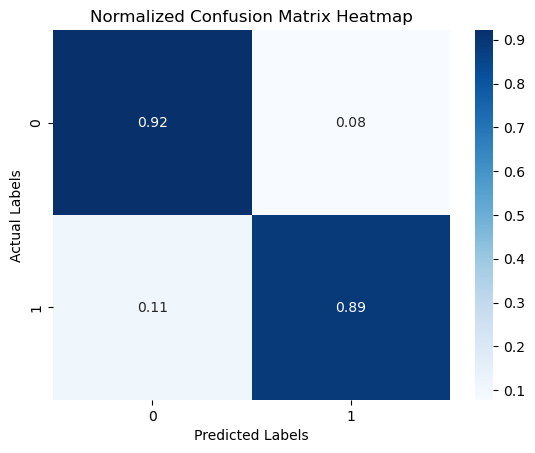

In [9]:
# 2 - Evaluating the Model with Normalized Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
print("Normalized Confusion Matrix:")
print(cm_normalized)

# confusion matrix heatmap
import seaborn as sns
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Normalized Confusion Matrix Heatmap")
plt.show()

# What is Normalized Confusion Matrix?
# A normalized confusion matrix is a version of the confusion matrix where the values are normalized to represent the proportion of each class that is correctly or incorrectly classified.
# It is useful for comparing the performance of different models on imbalanced datasets.

In [ ]:
# 3 - Evaluating the Model with Recall (Sensitivity)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

# What is Recall?
# Recall is the ratio of true positives to the sum of true positives and false negatives.
# It measures the model's ability to correctly identify all relevant instances (i.e., how many of the actual positive cases were correctly identified by the model).
# Recall is particularly important in scenarios where the cost of false negatives is high, such as in medical diagnosis or fraud detection, where failing to identify a positive case can have serious consequences.
# A high recall indicates that the model is able to correctly identify a significant portion of the positive cases, which is critical for effective treatment or accurate fraud detection.
# For example, robbery detection, where the cost of missing a robbery (false negative) is much higher than the cost of a false alarm (false positive), recall would be a more important metric than precision.
# Another example is in medical diagnosis, where the cost of missing a disease (false negative) is much higher than the cost of a false alarm (false positive), recall would be a more important metric than precision.
# Another example is in email spam detection, where the cost of missing a spam email (false negative) is much higher than the cost of a false alarm (false positive), recall would be a more important metric than precision.

# Recall furmula is: Recall = TP / (TP + FN)

# Why recall is important in imbalanced data?
# In imbalanced data, the minority class is often of greater interest, and recall helps to measure the model's ability to correctly identify instances of the minority class, which is crucial for applications like fraud detection or medical diagnosis where missing positive cases can have severe consequences.

# Why recall is not a good metric for imbalanced data?
# Recall alone can be misleading in imbalanced data because it does not take into account the false positives. A model could have a high recall by simply predicting the positive class for all instances, which would lead to a large number of false positives and may not be desirable in many applications. 
# Therefore, it is often important to consider both recall and precision together (e.g., using F1-score) to get a more balanced evaluation of the model's performance on imbalanced datasets.

Recall: 0.89


In [ ]:
# 4 - Evaluating the Model with Precision(Positive Predictive Value)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")

# What is Precision?
# Precision is the ratio of true positives to the sum of true positives and false positives.
# It measures the model's ability to correctly identify positive instances (i.e., how many of the predicted positive cases were actually positive).
# Precision is particularly important in scenarios where the cost of false positives is high, such as in spam detection or medical diagnosis where a false positive can lead to unnecessary treatment or inconvenience.
# For example, in spam detection, a high precision indicates that most of the emails flagged as spam are indeed spam, which is desirable to avoid incorrectly flagging legitimate emails as spam.
# Another example is in medical diagnosis, where a high precision indicates that most of the patients diagnosed with a disease actually have the disease, which is important to avoid unnecessary treatment for healthy patients.
# Another example is robbery detection, where the cost of a false positive (incorrectly identifying a non-robbery as a robbery) can lead to unnecessary investigations and resource allocation, while a high precision would indicate that most of the cases identified as robberies are indeed robberies, which is desirable for efficient use of resources.

# Precision formula is: Precision = TP / (TP + FP)

# Why precision is important in imbalanced data?
# In imbalanced data, the minority class is often of greater interest, and precision helps to measure the model's ability to correctly identify instances of the minority class without generating a large number of false positives, which is crucial for applications like spam detection or medical diagnosis where false positives can lead to unnecessary treatment or inconvenience.

# Why precision is not a good metric for imbalanced data?
# Precision alone can be misleading in imbalanced data because it does not take into account the false negatives. A model could have a high precision by simply predicting the negative class for all instances, which would lead to a large number of false negatives and may not be desirable in many applications.
# Therefore, it is often important to consider both precision and recall together (e.g., using F1-score) to get a more balanced evaluation of the model's performance on imbalanced datasets.